In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

#定义10折交叉
kf = KFold(n_splits=10, shuffle=True, random_state=42)

## 1.数据预处理和探索

In [3]:
# 读取训练数据和测试数据
train_data = pd.read_csv('./datasets/optdigits.tra', header=None)
test_data = pd.read_csv('./datasets/optdigits.tes', header=None)
#打印数据大小信息
print(train_data.shape,test_data.shape)

(3823, 65) (1797, 65)


In [4]:
# 将数据和标签分开
X_train = train_data.iloc[:,:-1].values
y_train = train_data.iloc[:,-1].values
X_test = test_data.iloc[:,:-1].values
y_test = test_data.iloc[:,-1].values

print(X_train.shape)

(3823, 64)


In [5]:
#转化为 8*8
Tra_images = X_train.reshape(-1, 8, 8)
Tes_images = X_test.reshape(-1, 8, 8)
print(Tra_images[0])
Tra_images.shape

[[ 0  1  6 15 12  1  0  0]
 [ 0  7 16  6  6 10  0  0]
 [ 0  8 16  2  0 11  2  0]
 [ 0  5 16  3  0  5  7  0]
 [ 0  7 13  3  0  8  7  0]
 [ 0  4 12  0  1 13  5  0]
 [ 0  0 14  9 15  9  0  0]
 [ 0  0  6 14  7  1  0  0]]


(3823, 8, 8)

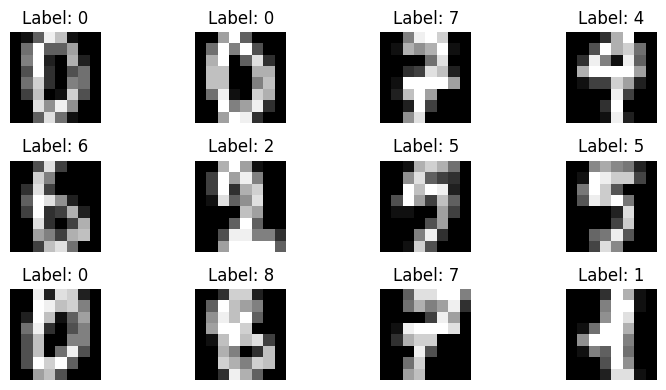

In [6]:
#输出图像
plt.figure(figsize=(8, 4))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.imshow(Tra_images[i-1], cmap='gray')
    plt.title(f"Label: {y_train[i-1]}")
    plt.axis('off')

plt.tight_layout()

In [18]:
#二值化
# 创建一个数组以存储二值化后的图像
Tra_binary = np.zeros_like(Tra_images, dtype=np.uint8)
Tes_binary = np.zeros_like(Tes_images, dtype=np.uint8)

# 对图像应用自适应阈值二值化
for i in range(len(Tra_images)):
    image_uint8 = Tra_images[i].astype(np.uint8)
     # 应用自适应阈值二值化
    binary_image = cv2.adaptiveThreshold(image_uint8, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 19, 2)
    Tra_binary[i] = binary_image

for i in range(len(Tes_images)):
    image_uint8 = Tes_images[i].astype(np.uint8)
     # 应用自适应阈值二值化
    binary_image = cv2.adaptiveThreshold(image_uint8, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 19, 2)
    Tes_binary[i] = binary_image
    
Tra_binary[1]

array([[0, 0, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0]], dtype=uint8)

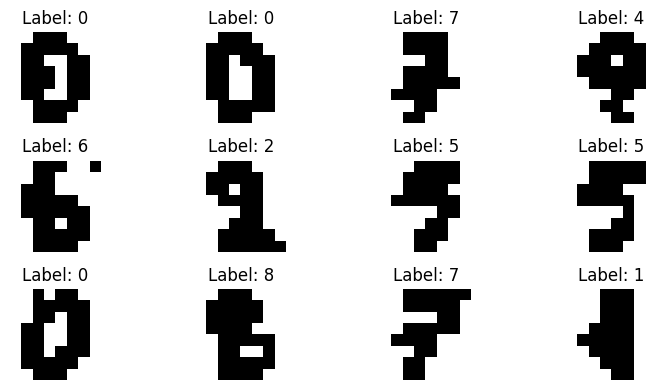

In [19]:
#输出图像
plt.figure(figsize=(8, 4))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.imshow(Tra_binary[i-1], cmap='binary', vmin=0, vmax=1)
    plt.title(f"Label: {y_train[i-1]}")
    plt.axis('off')

plt.tight_layout()

In [20]:
#再转化回来一维矩阵
X1_train = Tra_binary.reshape((-1,64))
X1_test = Tes_binary.reshape((-1,64))

X1_train.shape

(3823, 64)

In [21]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X_train)
X2_test = scaler.fit_transform(X_test)

X2_train[0]

array([ 0.        ,  0.80596144,  0.11189377,  0.74991729,  0.12090073,
       -0.80276201, -0.41156658, -0.13533236, -0.02362917,  1.65123657,
        0.99777993, -1.42470757, -0.96603501,  0.28719213, -0.54167804,
       -0.15371977, -0.04147088,  1.5647766 ,  1.09072481, -0.80016922,
       -1.17008119,  0.46920377, -0.01285497, -0.11294321, -0.03236348,
        0.86351952,  1.10341132, -1.03928377, -1.53982306, -0.47781378,
        1.28569254, -0.04857702, -0.0361882 ,  1.54367312,  0.85329603,
       -1.00785975, -1.74810268, -0.20414887,  1.1725723 ,  0.        ,
       -0.08687393,  0.8842723 ,  0.85222101, -1.11117025, -1.09595144,
        0.74504991,  0.34099745, -0.09305233, -0.06610453, -0.40823114,
        1.08209717, -0.17228382,  0.98511069, -0.04769026, -0.76390659,
       -0.19320098, -0.01617539, -0.30500748,  0.02894501,  0.47463116,
       -0.89378974, -0.98708887, -0.52279362, -0.17574055])

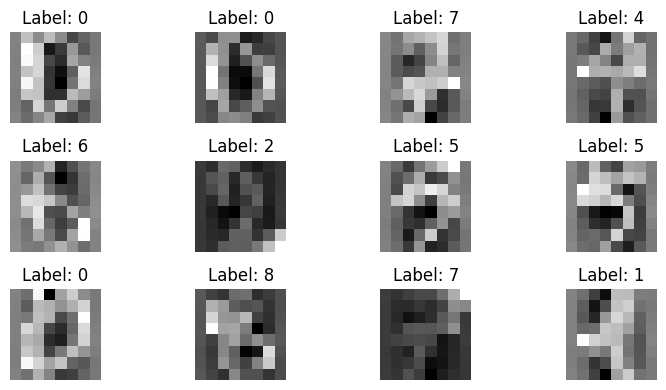

In [24]:
#输出图像
plt.figure(figsize=(8, 4))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.imshow(X2_train[i-1].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y_train[i-1]}")
    plt.axis('off')

plt.tight_layout()

In [25]:
#0-1归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X3_train = scaler.fit_transform(X_train)
X3_test = scaler.fit_transform(X_test)

X3_train[0]

array([0.        , 0.125     , 0.375     , 0.9375    , 0.75      ,
       0.0625    , 0.        , 0.        , 0.        , 0.46666667,
       1.        , 0.375     , 0.375     , 0.625     , 0.        ,
       0.        , 0.        , 0.5       , 1.        , 0.125     ,
       0.        , 0.6875    , 0.125     , 0.        , 0.        ,
       0.3125    , 1.        , 0.1875    , 0.        , 0.3125    ,
       0.4375    , 0.        , 0.        , 0.46666667, 0.8125    ,
       0.1875    , 0.        , 0.5       , 0.5       , 0.        ,
       0.        , 0.25      , 0.75      , 0.        , 0.0625    ,
       0.8125    , 0.3125    , 0.        , 0.        , 0.        ,
       0.875     , 0.5625    , 0.9375    , 0.5625    , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.875     ,
       0.4375    , 0.0625    , 0.        , 0.        ])

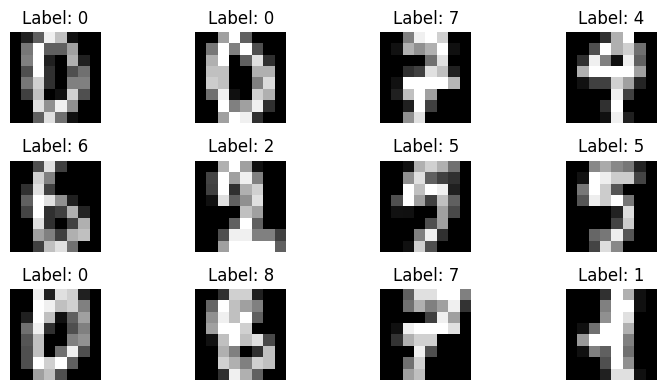

In [26]:
#输出图像
plt.figure(figsize=(8, 4))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.imshow(X3_train[i-1].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y_train[i-1]}")
    plt.axis('off')

plt.tight_layout()

## 2.KNN

（1）二值化：

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_list = list(range(1,50,2))
cv_score = []

for k in k_list:
    Knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(Knn,X1_train,y_train,cv=kf,scoring='accuracy')
    cv_score.append(scores.mean())

<Figure size 640x480 with 0 Axes>

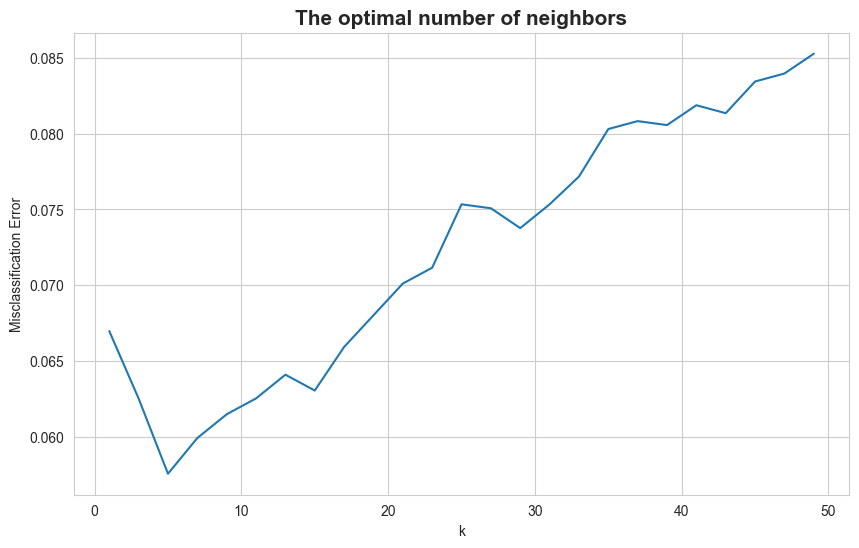

In [38]:
#可视化误分率
import seaborn as sns
MSE = [1 - x for x in cv_score]

plt.figure()
plt.figure(figsize=(10,6))

plt.title('The optimal number of neighbors', fontsize=15, fontweight='bold')

plt.xlabel('k',fontsize=10)
plt.ylabel('Misclassification Error',fontsize=10)

sns.set_style('whitegrid')
plt.plot(k_list,MSE)

In [39]:
best_k = k_list[MSE.index(min(MSE))]
print("最优近邻数k为：%d" % best_k)

最优近邻数k为：5


In [40]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X1_train, y_train)

accuracy = best_knn.score(X1_test, y_test)
accuracy

0.9215358931552587

（2）标准化：

<Figure size 640x480 with 0 Axes>

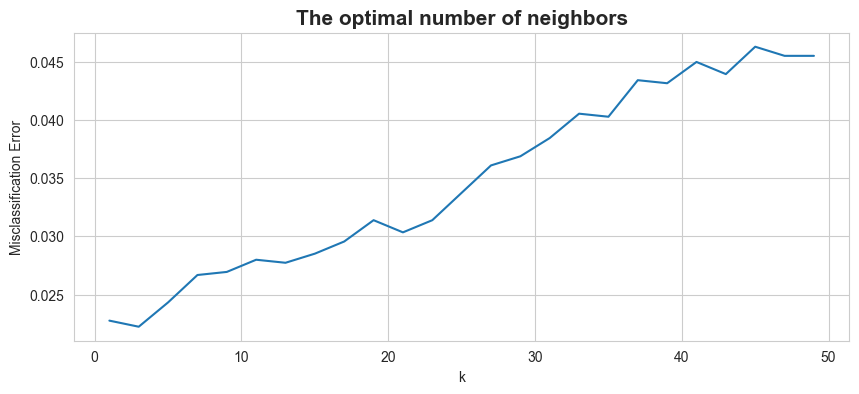

In [41]:
k_list = list(range(1,50,2))
cv_score = []

for k in k_list:
    Knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(Knn,X2_train,y_train,cv=kf,scoring='accuracy')
    cv_score.append(scores.mean())

#可视化误分率
import seaborn as sns
MSE1 = [1 - x for x in cv_score]

plt.figure()
plt.figure(figsize=(10,4))

plt.title('The optimal number of neighbors', fontsize=15, fontweight='bold')

plt.xlabel('k',fontsize=10)
plt.ylabel('Misclassification Error',fontsize=10)

sns.set_style('whitegrid')
plt.plot(k_list,MSE1)

In [42]:
best_k = k_list[MSE1.index(min(MSE1))]
print("最优近邻数k为：%d" % best_k)

最优近邻数k为：3


In [43]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X2_train, y_train)

accuracy = best_knn.score(X2_test, y_test)
accuracy

0.9671675013912076

（3）归一化：

<Figure size 640x480 with 0 Axes>

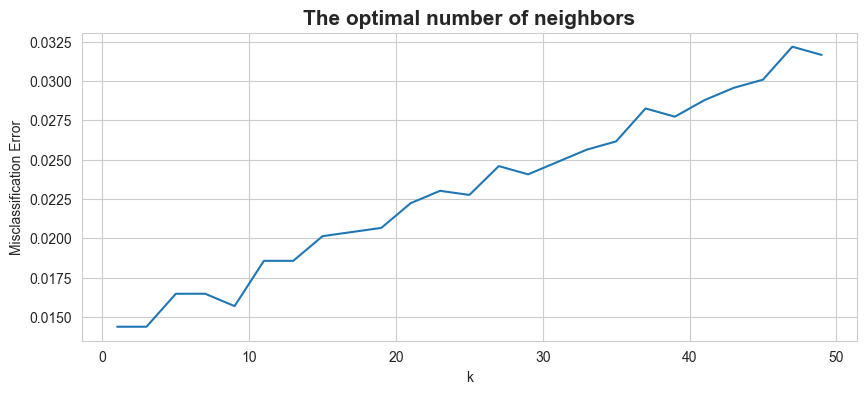

In [44]:
k_list = list(range(1,50,2))
cv_score = []

for k in k_list:
    Knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(Knn,X3_train,y_train,cv=kf,scoring='accuracy')
    cv_score.append(scores.mean())

#可视化误分率
import seaborn as sns
MSE2 = [1 - x for x in cv_score]

plt.figure()
plt.figure(figsize=(10,4))

plt.title('The optimal number of neighbors', fontsize=15, fontweight='bold')

plt.xlabel('k',fontsize=10)
plt.ylabel('Misclassification Error',fontsize=10)

sns.set_style('whitegrid')
plt.plot(k_list,MSE2)

In [45]:
best_k = k_list[MSE2.index(min(MSE2))]
print("最优近邻数k为：%d" % best_k)

最优近邻数k为：3


In [46]:
best_knn = KNeighborsClassifier(n_neighbors = best_k)
best_knn.fit(X3_train, y_train)

accuracy = best_knn.score(X3_test, y_test)
accuracy

0.9788536449638287

（4）原数据

<Figure size 640x480 with 0 Axes>

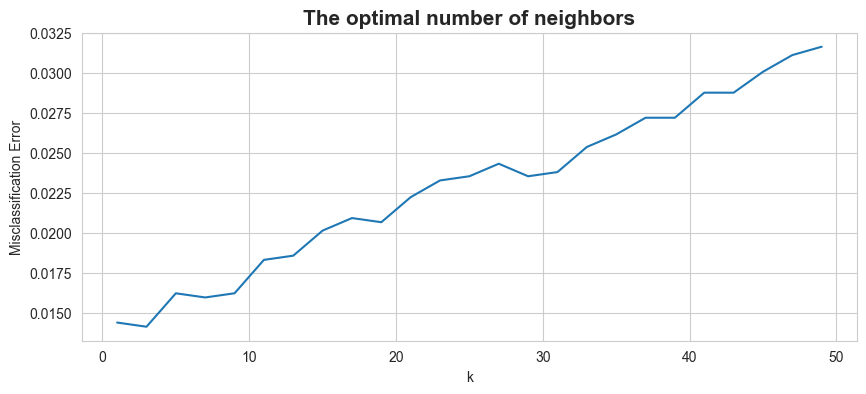

In [47]:
k_list = list(range(1,50,2))
cv_score = []

for k in k_list:
    Knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(Knn,X_train,y_train,cv=kf,scoring='accuracy')
    cv_score.append(scores.mean())

#可视化误分率
import seaborn as sns
MSE3 = [1 - x for x in cv_score]

plt.figure()
plt.figure(figsize=(10,4))

plt.title('The optimal number of neighbors', fontsize=15, fontweight='bold')

plt.xlabel('k',fontsize=10)
plt.ylabel('Misclassification Error',fontsize=10)

sns.set_style('whitegrid')
plt.plot(k_list,MSE3)

In [48]:
best_k = k_list[MSE3.index(min(MSE3))]
print("最优近邻数k为：%d" % best_k)

1-min(MSE3)

最优近邻数k为：3


0.9858754938280043

In [50]:
best_knn = KNeighborsClassifier(n_neighbors = best_k)
best_knn.fit(X_train, y_train)

accuracy = best_knn.score(X_test, y_test)
accuracy

0.9782971619365609

这里不得不说一下，这个optdigits数据集的原数据集好像效果比较好，二值化的效果居然是最差

后续的模型将只采用原数据。

## 3.SVM

（1）线性核：

In [23]:
from sklearn.svm import SVC #SVC是分类，用于回归的是SVR


# 初始化SVM模型，使用线性核
svm = SVC(kernel='linear')

# 定义超参数搜索范围
param_grid = {'C': [0.1, 1, 10, 100]}

# 使用GridSearchCV进行交叉验证寻找最佳的超参数
grid_search = GridSearchCV(svm, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 获取每次交叉验证的准确率
cv_results = grid_search.cv_results_
accuracies = cv_results['mean_test_score']
print("每次交叉验证的准确率：")
for params, acc in zip(cv_results['params'], accuracies):
    print(f"{params}: {acc:.4f}")

# 打印最佳的超参数
best_params = grid_search.best_params_
print(f"\n最佳的超参数：{best_params}")

# 使用最佳的超参数训练SVM模型
best_svm = SVC(kernel='linear', C=best_params['C'])
best_svm.fit(X_train, y_train)

# 在测试集上评估模型性能
accuracy = best_svm.score(X_test, y_test)
print(f"\n在测试集上的准确率：{accuracy}")

每次交叉验证的准确率：
{'C': 0.1}: 0.9793
{'C': 1}: 0.9796
{'C': 10}: 0.9796
{'C': 100}: 0.9796

最佳的超参数：{'C': 1}

在测试集上的准确率：0.9610461880912632


（2）高斯核：

In [24]:
# 初始化SVM模型
svm = SVC()
# 定义超参数搜索范围
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# 使用GridSearchCV进行交叉验证寻找最佳的超参数
grid_search = GridSearchCV(svm, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 获取每次交叉验证的准确率
cv_results = grid_search.cv_results_
accuracies = cv_results['mean_test_score']
print("每次交叉验证的准确率：")
for params, acc in zip(cv_results['params'], accuracies):
    print(f"{params}: {acc:.4f}")

# 打印最佳的超参数
best_params = grid_search.best_params_
print(f"\n最佳的超参数：{best_params}")

# 使用最佳的超参数训练SVM模型
best_svm = SVC(C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, y_train)

# 在测试集上评估模型性能
accuracy = best_svm.score(X_test, y_test)
print(f"\n在测试集上的准确率：{accuracy}")

每次交叉验证的准确率：
{'C': 0.1, 'gamma': 0.001}: 0.9775
{'C': 0.1, 'gamma': 0.01}: 0.0868
{'C': 0.1, 'gamma': 0.1}: 0.0829
{'C': 0.1, 'gamma': 1}: 0.0829
{'C': 1, 'gamma': 0.001}: 0.9895
{'C': 1, 'gamma': 0.01}: 0.8253
{'C': 1, 'gamma': 0.1}: 0.0832
{'C': 1, 'gamma': 1}: 0.0829
{'C': 10, 'gamma': 0.001}: 0.9908
{'C': 10, 'gamma': 0.01}: 0.8365
{'C': 10, 'gamma': 0.1}: 0.0832
{'C': 10, 'gamma': 1}: 0.0829
{'C': 100, 'gamma': 0.001}: 0.9908
{'C': 100, 'gamma': 0.01}: 0.8365
{'C': 100, 'gamma': 0.1}: 0.0832
{'C': 100, 'gamma': 1}: 0.0829

最佳的超参数：{'C': 10, 'gamma': 0.001}

在测试集上的准确率：0.9827490261547023


(3)多项式核

In [25]:
# 初始化SVM模型，使用多项式核
svm = SVC(kernel='poly')

# 定义超参数搜索范围
param_grid = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]}

# 使用GridSearchCV进行交叉验证寻找最佳的超参数
grid_search = GridSearchCV(svm, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 获取每次交叉验证的准确率
cv_results = grid_search.cv_results_
accuracies = cv_results['mean_test_score']
print("每次交叉验证的准确率：")
for params, acc in zip(cv_results['params'], accuracies):
    print(f"{params}: {acc:.4f}")

# 打印最佳的超参数
best_params = grid_search.best_params_
print(f"\n最佳的超参数：{best_params}")

# 使用最佳的超参数训练SVM模型
best_svm = SVC(kernel='poly', C=best_params['C'], degree=best_params['degree'])
best_svm.fit(X_train, y_train)

# 在测试集上评估模型性能
accuracy = best_svm.score(X_test, y_test)
print(f"\n在测试集上的准确率：{accuracy}")

每次交叉验证的准确率：
{'C': 0.1, 'degree': 2}: 0.9770
{'C': 0.1, 'degree': 3}: 0.9848
{'C': 0.1, 'degree': 4}: 0.9869
{'C': 0.1, 'degree': 5}: 0.9877
{'C': 1, 'degree': 2}: 0.9885
{'C': 1, 'degree': 3}: 0.9898
{'C': 1, 'degree': 4}: 0.9895
{'C': 1, 'degree': 5}: 0.9888
{'C': 10, 'degree': 2}: 0.9880
{'C': 10, 'degree': 3}: 0.9888
{'C': 10, 'degree': 4}: 0.9895
{'C': 10, 'degree': 5}: 0.9888
{'C': 100, 'degree': 2}: 0.9885
{'C': 100, 'degree': 3}: 0.9888
{'C': 100, 'degree': 4}: 0.9895
{'C': 100, 'degree': 5}: 0.9888

最佳的超参数：{'C': 1, 'degree': 3}

在测试集上的准确率：0.9755147468002225


## 4.随机森林

In [26]:
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林模型
rf_classifier = RandomForestClassifier()

# 定义超参数搜索范围
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# 使用GridSearchCV进行交叉验证寻找最佳的超参数
grid_search = GridSearchCV(rf_classifier, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 获取每次交叉验证的准确率
cv_results = grid_search.cv_results_
accuracies = cv_results['mean_test_score']
print("每次交叉验证的准确率：")
for params, acc in zip(cv_results['params'], accuracies):
    print(f"{params}: {acc:.4f}")

# 打印最佳的超参数
best_params = grid_search.best_params_
print(f"\n最佳的超参数：{best_params}")

# 使用最佳的超参数训练随机森林模型
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# 在测试集上评估模型性能
accuracy = best_rf_classifier.score(X_test, y_test)
print(f"\n在测试集上的准确率：{accuracy}")

每次交叉验证的准确率：
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}: 0.9788
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}: 0.9786
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}: 0.9809
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}: 0.9770
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}: 0.9788
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}: 0.9806
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}: 0.9736
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}: 0.9767
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}: 0.9799
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}: 0.9772
{'max_depth': None, 'min_samp

## 5.简单CNN神经网络

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 读取训练数据和测试数据
train_data = pd.read_csv('./datasets/optdigits.tra', header=None)
test_data = pd.read_csv('./datasets/optdigits.tes', header=None)

# 将数据和标签分离
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将数据集转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 将数据包装成 TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# 创建 DataLoader 加载数据
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定义 CNN 模型
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(64 * 2 * 2, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 8, 8)  # 将数据重塑为图像格式
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 64 * 2 * 2)
        # print(x.shape)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 训练模型
best_accuracy = 0.0
best_epoch = 0
num_epochs =50

# 定义 K 折交叉验证
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True)

for fold, (train_indices, val_indices) in enumerate(kf.split(train_dataset)):
    # 创建训练集和验证集的 DataLoader
    train_subset = torch.utils.data.Subset(train_dataset, train_indices)
    val_subset = torch.utils.data.Subset(train_dataset, val_indices)

    train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

    # 模型、优化器等的初始化
    model = CNNModel()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 训练模型
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        total_correct = 0
        total_samples = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # 在验证集上计算准确率
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Fold {fold + 1}, Epoch {epoch + 1}/{num_epochs}, Validation Accuracy: {accuracy:.4f}')

        # 记录最佳模型
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epoch = epoch
            # 保存最佳模型参数
            best_model_params = model.state_dict()

# 输出最佳模型的准确率和保存参数的 epoch
print(f'\nBest Accuracy: {best_accuracy:.4f} (Epoch {best_epoch + 1})')

#保存参数
torch.save(best_model_params, 'params.pth')

# 加载最佳模型的参数到模型
model.load_state_dict(best_model_params)

# 在测试集上评估模型性能
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, test_predicted = torch.max(test_outputs, 1)
    test_accuracy = torch.sum(test_predicted == y_test_tensor).item() / len(y_test_tensor)
    print(f"在测试集上的准确率：{test_accuracy:.4f}")

Fold 1, Epoch 1/50, Validation Accuracy: 0.9203
Fold 1, Epoch 2/50, Validation Accuracy: 0.9569
Fold 1, Epoch 3/50, Validation Accuracy: 0.9699
Fold 1, Epoch 4/50, Validation Accuracy: 0.9765
Fold 1, Epoch 5/50, Validation Accuracy: 0.9791
Fold 1, Epoch 6/50, Validation Accuracy: 0.9765
Fold 1, Epoch 7/50, Validation Accuracy: 0.9817
Fold 1, Epoch 8/50, Validation Accuracy: 0.9856
Fold 1, Epoch 9/50, Validation Accuracy: 0.9843
Fold 1, Epoch 10/50, Validation Accuracy: 0.9843
Fold 1, Epoch 11/50, Validation Accuracy: 0.9843
Fold 1, Epoch 12/50, Validation Accuracy: 0.9869
Fold 1, Epoch 13/50, Validation Accuracy: 0.9869
Fold 1, Epoch 14/50, Validation Accuracy: 0.9895
Fold 1, Epoch 15/50, Validation Accuracy: 0.9882
Fold 1, Epoch 16/50, Validation Accuracy: 0.9869
Fold 1, Epoch 17/50, Validation Accuracy: 0.9908
Fold 1, Epoch 18/50, Validation Accuracy: 0.9882
Fold 1, Epoch 19/50, Validation Accuracy: 0.9882
Fold 1, Epoch 20/50, Validation Accuracy: 0.9908
Fold 1, Epoch 21/50, Validati